In [42]:
import pandas as pd
import numpy as np
import pandas_profiling as ppf #EDA report 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [3]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

### EDA with One-click 
Here use `pandas_profiling` to do Exploratory data analysis; this powerful packckage will generate a very detailed report of the dataset with missing values, variables analysis, all kinds of basic plot and corellation analysis, and hence we could have a overview about the dataset we're starring at.

In [9]:
"""profile = ppf.ProfileReport(train) #EDA 
profile.to_file(output_file="eda-report.html")"""
ppf.ProfileReport(train)

Now let's have some tastes about our dataset with some plots.

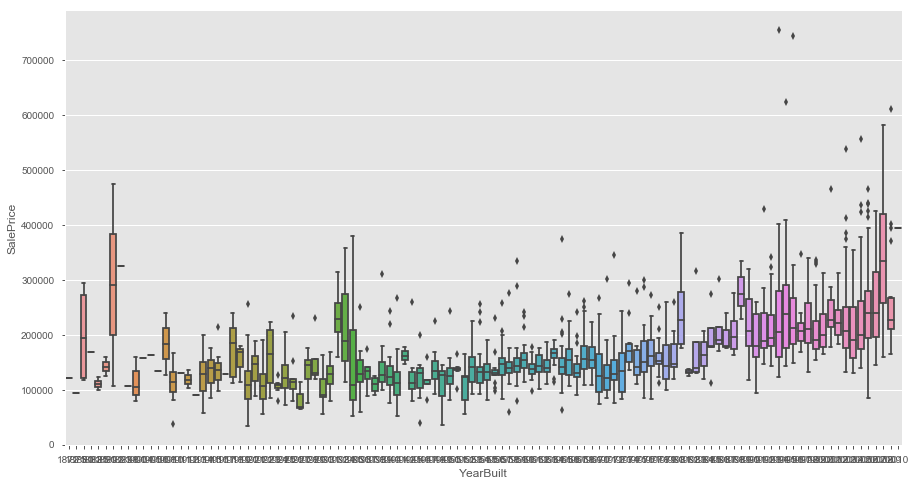

In [8]:
plt.figure(figsize=(10,8))
sns.boxplot(train.YearBuilt, train.SalePrice)

(0, 800000)

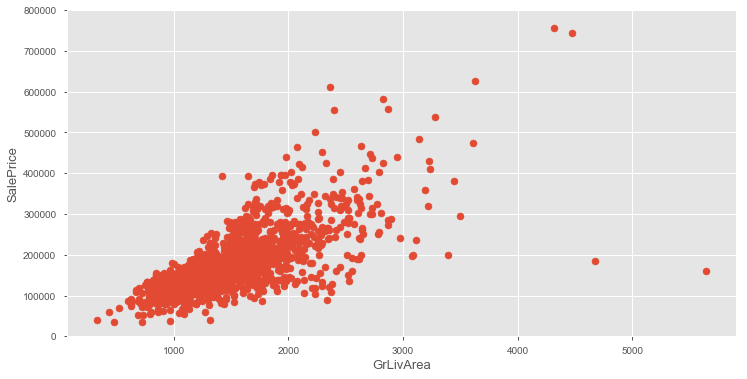

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea,y = train.SalePrice) ## scatter plot used to check if there any linear relationships
plt.xlabel('GrLivArea',fontsize = 13)
plt.ylabel('SalePrice',fontsize = 13)
plt.ylim(0,800000)

In [18]:
# delete the outliers' index
train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index,inplace = True)

In [19]:
# concat the train and test for later use for data cleaning.
full = pd.concat([train,test],ignore_index=True)
# Delete the repeated 'Id' column
full.drop('Id',axis = 1,inplace = True)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 80 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

### Data Cleaning

1. fill missing values;
2. remove missing values;


In [21]:
# count the missing values with
miss = full.isnull().sum()
# sort the counts with descending order when counts not equal to zero
miss[miss>0].sort_values(ascending=False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

#### fill and remove the missing values
1. for string type of values, fillna with `None`
2. for numerical values, 

In [38]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 80 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

Select all the columns that contains string value, and fillna with 'None'

In [39]:
constr = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in colstr:
    full[col].fillna("None",inplace=True)

Select some of the columns that contains numerical value, and fillna with 0

In [40]:
colnu=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in colnu:
    full[col].fillna(0, inplace=True)

`LotFrontage` has only 486 vlaues, which means it has a lot missing values, so replace the missing values with the mean() of this column.

In [43]:
full.LotFrontage.fillna(np.mean(full.LotFrontage),inplace = True)

For the following colmns, fillna with mode()

In [50]:
cols = ["MSZoning", "BsmtFullBath", 'GarageYrBlt',"BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols:
    full[col].fillna(full[col].mode()[0], inplace=True)

Check is there are any col with missing values. Supposedly in the `full`, there is a column `SalePrice` still has a lot of missing values, since we have concat the `train` and `test`, and `test` set has `SalePrice` left blank, for it is the value we need to predict as our ultimate goal in the project.

In [51]:
full.isnull().sum()[full.isnull().sum()>0]

SalePrice    1459
dtype: int64

159